In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.cc","k")

Welcome to JupyROOT 6.28/00


In [2]:
date = "JUN29"
mes = "D"

chainNone = ROOT.TChain("events")
chainIso = ROOT.TChain("events")

if mes == "D":
    #chainNone.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1041_GFcat_D0StarCat_2018_none.root".format(date))
    #chainIso.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1041_GFcat_D0StarCat_2018_iso.root".format(date))
    chainNone.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1041_GFcat_D0StarCat_2018_noneNoLepFilt.root".format(date))
    chainIso.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1041_GFcat_D0StarCat_2018_isoNoLepFilt.root".format(date))
    #chainIso.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1041_GFcat_D0StarCat_2018.root".format(date))
elif mes == "DR":
    chainNone.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1040_GFcat_D0StarRhoCat_2018_none.root".format(date))
    chainIso.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1040_GFcat_D0StarRhoCat_2018_iso.root".format(date))

df_post = ROOT.RDataFrame(chainNone)
df_postfiltered = df_post.Define("scale", "w*lumiIntegrated").Filter("goodMeson_iso[0]>0.90")
GOODD0STAR = "goodMeson_iso>0.9"
isD0StarCat = "true"
df_postnofiltered = df_post.Define("scale", "w*lumiIntegrated")#.Define("goodMesonOldBIS","({}".format(GOODD0STAR)+" && {}".format(isD0StarCat)+")").Filter("Sum(goodMesonOldBIS)>0", "one good D0Star (ptPhi, validfit, ptTracks)")

df_pre = ROOT.RDataFrame(chainIso)
df_pre = df_pre.Define("scale", "w*lumiIntegrated")

In [3]:
cols = ["goodMeson_ditrk_pt", "goodMeson_iso", "goodMesonOld", "goodMeson"]
x = df_pre.AsNumpy(columns=cols)
pddf = pd.DataFrame(x)
pddf["goodMeson_iso"] = pddf["goodMeson_iso"].apply(lambda x: x[0])

display(pddf[pddf["goodMeson_iso"] > 0.899])

,goodMeson_ditrk_pt,goodMeson_iso,goodMesonOld,goodMeson
0,[55.30473327636719],1.000000,"[1, 1]","[1, 0]"
1,[66.00482177734375],0.974874,[1],[1]
2,[56.43233108520508],1.000000,[1],[1]
3,[63.510780334472656],0.965211,[1],[1]
4,[73.96388244628906],1.000000,[1],[1]
...,...,...,...,...
62300,[56.70991516113281],1.000000,[1],[1]
62301,[46.93718338012695],1.000000,[1],[1]
62302,[52.460086822509766],1.000000,"[1, 0, 1]","[1, 0, 0]"
62303,[57.48320388793945],1.000000,[1],[1]


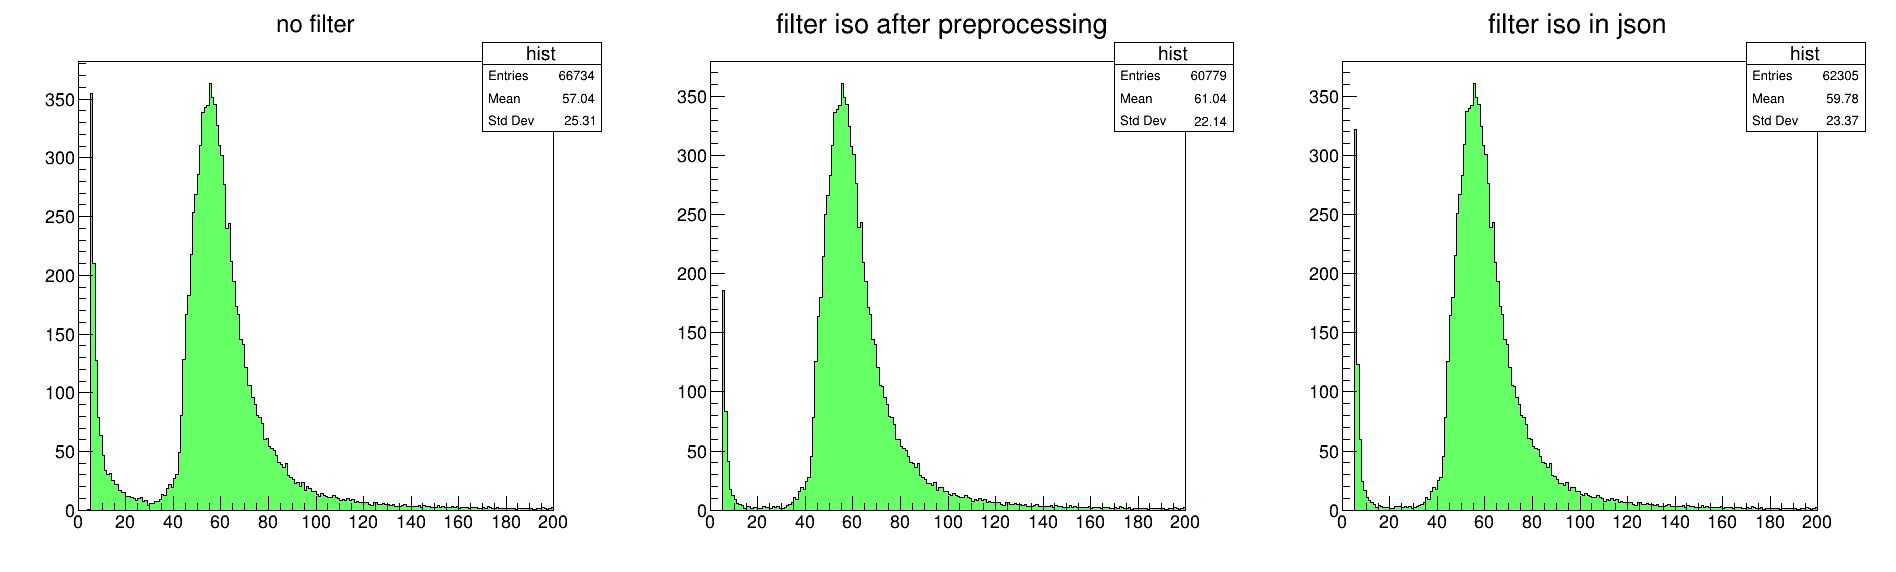

In [4]:
canvas = ROOT.TCanvas("canvas", "canvas", 1900, 600)
canvas.Divide(3, 1)

nbins, xlow, xhigh, var = 200, 0.0, 200.0, "goodMeson_ditrk_pt"

h_post = df_postfiltered.Histo1D(("hist", "filter iso after preprocessing", nbins, xlow, xhigh), var, "scale")
h_postnof = df_postnofiltered.Histo1D(("hist", "no filter", nbins, xlow, xhigh), var, "scale")
h_pre = df_pre.Histo1D(("hist", "filter iso in json", nbins, xlow, xhigh), var, "scale")

h_post.SetFillColor(ROOT.kGreen-7)
h_post.SetLineColor(ROOT.kBlack)
h_postnof.SetFillColor(ROOT.kGreen-7)
h_postnof.SetLineColor(ROOT.kBlack)
h_pre.SetFillColor(ROOT.kGreen-7)
h_pre.SetLineColor(ROOT.kBlack)

p = canvas.cd(1)
h_postnof.Draw("hist")
p = canvas.cd(2)
h_post.Draw("hist")
p = canvas.cd(3)
h_pre.Draw("hist")

canvas.Draw()

pt=7, iso=1
pt=70, iso=0.8




Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


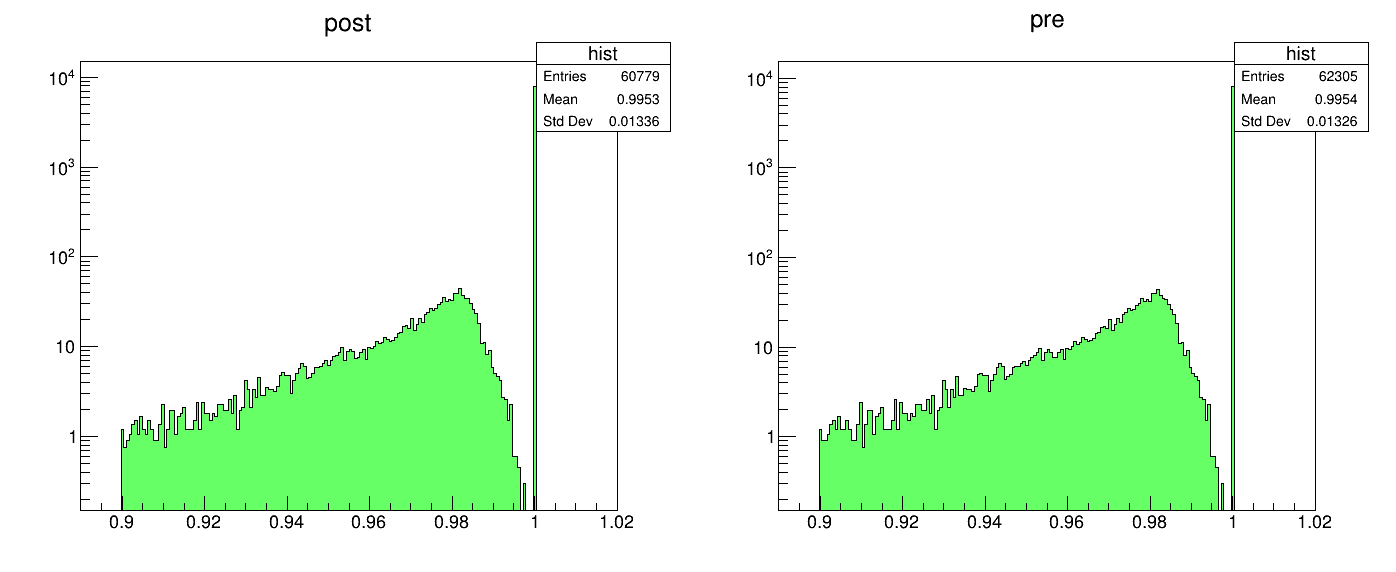

In [227]:
canvas = ROOT.TCanvas("canvas", "canvas", 1400, 600)
canvas.Divide(2, 1)

nbins, xlow, xhigh, var = 200, 0.89, 1.02, "goodMeson_iso"

h_post = df_postfiltered.Histo1D(("hist", "post", nbins, xlow, xhigh), var, "scale")
h_pre = df_pre.Histo1D(("hist", "pre", nbins, xlow, xhigh), var, "scale")

h_post.SetFillColor(ROOT.kGreen-7)
h_post.SetLineColor(ROOT.kBlack)
h_pre.SetFillColor(ROOT.kGreen-7)
h_pre.SetLineColor(ROOT.kBlack)

p = canvas.cd(1)
p.SetLogy()
h_post.Draw("hist")
p = canvas.cd(2)
p.SetLogy()
h_pre.Draw("hist")

canvas.Draw()

In [228]:
cols = ["goodMeson_ditrk_pt", "goodMeson_ditrk_eta", "goodMeson_ditrk_phi", "goodMeson_bestVtx_X", "goodMeson_iso", "goodMesonOld", "goodMeson"]
x = df_postfiltered.AsNumpy(columns=cols)
pddf = pd.DataFrame(x)

#pddf["lenGoodMeson"] = pddf["goodMeson_ditrk_pt"].apply(lambda x: len(x))
pddf["lenGoodMesonIso"] = pddf["goodMeson_iso"].apply(lambda x: len(x))
#pddf["goodMeson_iso"] = pddf["goodMeson_iso"].apply(lambda x: x[0])

display(pddf[pddf["lenGoodMesonIso"] == 1])

,goodMeson_ditrk_pt,goodMeson_ditrk_eta,goodMeson_ditrk_phi,goodMeson_bestVtx_X,goodMeson_iso,goodMesonOld,goodMeson,lenGoodMesonIso
0,[52.327632904052734],[1.4224265813827515],[-1.4820566177368164],[0.04547007009387016],[1.0],[1],[1],1
1,[84.69378662109375],[-0.5185202360153198],[-0.9421254992485046],[0.24624188244342804],[1.0],[1],[1],1
2,[67.16779327392578],[-0.1139771118760109],[0.5875433683395386],[0.11799813061952591],[1.0],[1],[1],1
3,[68.9554443359375],[-1.9638632535934448],[0.26161786913871765],[0.27406156063079834],[1.0],[1],[1],1
4,[64.23414611816406],[-1.7265758514404297],[-0.19276180863380432],[0.5894309878349304],[1.0],"[1, 1]","[1, 0]",1
...,...,...,...,...,...,...,...,...
60774,[181.1201934814453],[-1.2908307313919067],[-1.1507072448730469],[0.6476882696151733],[1.0],"[1, 1]","[1, 0]",1
60775,[56.18528747558594],[-0.015648439526557922],[-0.47284674644470215],[1.0669536590576172],[1.0],[1],[1],1
60776,[61.4449577331543],[0.48133111000061035],[2.8286025524139404],[-0.13581128418445587],[0.9833860993385315],[1],[1],1
60777,[54.838802337646484],[-0.45192551612854004],[-2.376488447189331],[-0.6057336926460266],[1.0],"[1, 1]","[1, 0]",1


In [229]:
pddf_pre = df_pre.AsNumpy(columns=cols)
pt_pre = np.asarray([x[0] for x in pddf_pre["goodMeson_ditrk_pt"]])
eta_pre = np.asarray([x[0] for x in pddf_pre["goodMeson_ditrk_eta"]])
phi_pre = np.asarray([x[0] for x in pddf_pre["goodMeson_ditrk_phi"]])
vtx_pre = np.asarray([x[0] for x in pddf_pre["goodMeson_bestVtx_X"]])
id_pre = pt_pre + eta_pre + phi_pre + vtx_pre
print(len(id_pre))
iso_pre = pddf_pre["goodMeson_iso"]
iso_pre = np.asarray([x[0] for x in iso_pre])

pddf_postfiltered = df_postfiltered.AsNumpy(columns=cols)
pt_postfiltered = np.asarray([x[0] for x in pddf_postfiltered["goodMeson_ditrk_pt"]])
eta_postfiltered = np.asarray([x[0] for x in pddf_postfiltered["goodMeson_ditrk_eta"]])
phi_postfiltered = np.asarray([x[0] for x in pddf_postfiltered["goodMeson_ditrk_phi"]])
vtx_postfiltered = np.asarray([x[0] for x in pddf_postfiltered["goodMeson_bestVtx_X"]])
id_postfiltered = pt_postfiltered + eta_postfiltered + phi_postfiltered + vtx_postfiltered
print(len(id_postfiltered))
iso_postfiltered = pddf_postfiltered["goodMeson_iso"]
iso_postfiltered = np.asarray([x[0] for x in iso_postfiltered])

pddf_postnofiltered = df_postnofiltered.AsNumpy(columns=cols)
pt_postnofiltered = np.asarray([x[0] for x in pddf_postnofiltered["goodMeson_ditrk_pt"]])
eta_postnofiltered = np.asarray([x[0] for x in pddf_postnofiltered["goodMeson_ditrk_eta"]])
phi_postnofiltered = np.asarray([x[0] for x in pddf_postnofiltered["goodMeson_ditrk_phi"]])
vtx_postnofiltered = np.asarray([x[0] for x in pddf_postnofiltered["goodMeson_bestVtx_X"]])
id_postnofiltered = pt_postnofiltered + eta_postnofiltered + phi_postnofiltered + vtx_postnofiltered
print(len(id_postnofiltered))
iso_postnofiltered = pddf_postnofiltered["goodMeson_iso"]
iso_postnofiltered = np.asarray([x[0] for x in iso_postnofiltered])

print("id pre: ", len(id_pre), len(set(id_pre)))

print("id postfiltered: ", len(id_postfiltered), len(set(id_postfiltered)))

print("id postnofiltered: ", len(id_postnofiltered), len(set(id_postnofiltered)))

pre_nopostfilt = list(set(id_pre).difference(set(id_postfiltered)))

print("no-post-pre", len((set(id_postnofiltered).difference(set(id_postfiltered))).difference(set(id_pre))))
print("post-pre-no", len((set(id_postfiltered).difference(set(id_postnofiltered))).difference(set(id_pre))))
print("pre-no-post", len((set(id_pre).difference(set(id_postfiltered))).difference(set(id_postnofiltered))))
print("Triple intersection", len((set(id_postnofiltered).intersection(set(id_postfiltered))).intersection(set(id_pre))))
print("No-Pre intersection", len((set(id_postnofiltered).intersection(set(id_pre)))))



print(len(set(id_postnofiltered).difference(set(id_pre))))

print(len(set(id_pre).difference(set(id_postfiltered))))
print(len(set(id_pre).difference(set(id_postnofiltered))))

print(len(set(id_postfiltered).difference(set(id_postnofiltered))))
print(len(set(id_postfiltered).difference(set(id_pre))))

'''

n = 100
n = len(pre_nopostfilt)

for i in range(n):
    if np.isin(pre_nopostfilt[i], pt_pre):
        continue
        print("Is in PRE (OFC): ", pre_nopostfilt[i], iso_pre[np.where(pt_pre == pre_nopostfilt[i])[0][0]])
    if np.isin(pre_nopostfilt[i], pt_postfiltered):
        print("Is in POST Filt: ", pre_nopostfilt[i], iso_pre[np.where(pt_postfiltered == pre_nopostfilt[i])[0][0]])
    if np.isin(pre_nopostfilt[i], pt_postnofiltered):
        print("Is in POST NO Filt: ", pre_nopostfilt[i], iso_pre[np.where(pt_postnofiltered == pre_nopostfilt[i])[0][0]])



'''


62305
60779
66734
id pre:  62305 62305
id postfiltered:  60779 60779
id postnofiltered:  66734 66734
no-post-pre 5955
post-pre-no 0
pre-no-post 1526
Triple intersection 60779
No-Pre intersection 60779
5955
1526
1526
0
0


'\n\nn = 100\nn = len(pre_nopostfilt)\n\nfor i in range(n):\n    if np.isin(pre_nopostfilt[i], pt_pre):\n        continue\n        print("Is in PRE (OFC): ", pre_nopostfilt[i], iso_pre[np.where(pt_pre == pre_nopostfilt[i])[0][0]])\n    if np.isin(pre_nopostfilt[i], pt_postfiltered):\n        print("Is in POST Filt: ", pre_nopostfilt[i], iso_pre[np.where(pt_postfiltered == pre_nopostfilt[i])[0][0]])\n    if np.isin(pre_nopostfilt[i], pt_postnofiltered):\n        print("Is in POST NO Filt: ", pre_nopostfilt[i], iso_pre[np.where(pt_postnofiltered == pre_nopostfilt[i])[0][0]])\n\n\n\n'

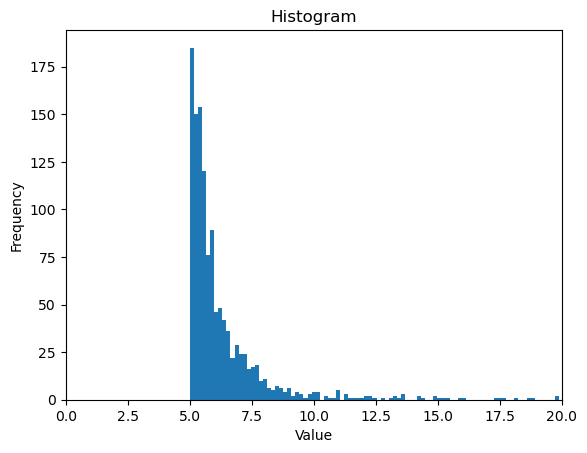

In [148]:


# Plot histogram
plt.hist(pre_nopostfilt, bins=1000)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.xlim([0, 20])
plt.show()